In [1]:
# Import Libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-whitegrid')

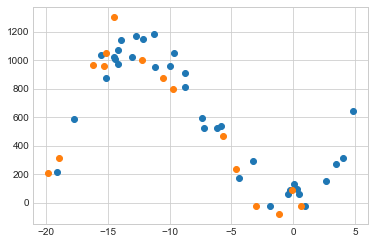

In [8]:
# Define Simulated Data from Problem
noise_scale = 100 
number_of_samples = 50
x = 25 * (np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale * np.random.randn(number_of_samples, 1) 

# Split Training Data (70%) and Test Data (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10413641)

# Plot Training Data (Blue) and Test Data (Orange)
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.show()

In [10]:
# Squeeze 'x' and 'y' into 1D arrays
x_train = np.squeeze(x_train)
x_test = np.squeeze(x_test)
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

**Part 1**

Please plot the noisy data and the polynomial you found (in the same figure). You can use any value of m selected from 2, 3, 4, 5, 6.

For this problem, since the noisy data follows a third degree polynomial, we will select m=3 for the polyfit() function. The original noisy data can be seen below (Blue) overlayed by the fitted polynomial (Red). It can be observed that for m > 3 the same polynomial shape will be found, since the original data is only third order. 

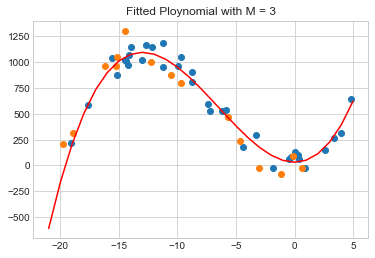

In [11]:
# Fit Training Data using polyfit() Function
poly = np.poly1d(np.polyfit(x_train, y_train, 3))
xfit = []
yfit = []
for i in range(math.floor(min(x_train))-1, math.ceil(max(x_train))+1):
  xfit.append(i)
  yfit.append(poly(i))

plt.title('Fitted Ploynomial with M = 3')
plt.plot(xfit, yfit, 'r')
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.show()

**Part 2**

Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. Identify the best choice of m.

Based on the results shown below, the mean-squared error decreases as the order of 'm' increases. For our specific plot, an order of m=3 is sufficient to achieve a minimal error, and prevent overfitting. This result would also be expected since the original data follows a third order polynomial. As shown in the graph, the testing data (Orange) is slightly higher than the training data (Blue) which also makes sense because we would expect the model to perform slightly worse on unseen testing data. 

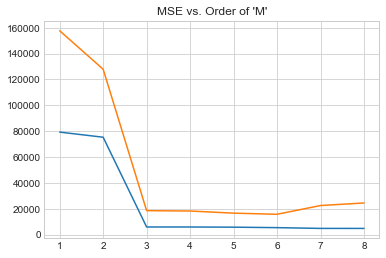

In [12]:
# Plot MSE vs. Order 'M'
mseTrain = []
mseTest  = []
for d in range(8):
  poly = np.poly1d(np.polyfit(x_train, y_train, (d+1)))
  yfitTrain = []
  yfitTest = []
  for i in range(len(x_train)):
    yfitTrain.append(poly(x_train[i]))
  for i in range(len(x_test)):
    yfitTest.append(poly(x_test[i]))
  mseTrain.append(np.square(y_train - yfitTrain).mean())
  mseTest.append(np.square(y_test - yfitTest).mean())

plt.plot([1,2,3,4,5,6,7,8], mseTrain)
plt.plot([1,2,3,4,5,6,7,8], mseTest)
plt.title("MSE vs. Order of 'M'")
plt.show()

**Part 3**

Change variable noise_scale to 150, 200, 400, 600, 1000 respectively, re-run the algorithm and
plot the polynomials with the m found in 2). Discuss the impact of noise scale to the accuracy of
the returned parameters. [You need to plot a figure like in 1) for each choice of noise_scale.]

In this problem, the noise scale of the original ploynomial was quadratically sampled from 150 to 1000. The original noisy data can be seen below (Blue) overlayed by the fitted polynomial (Red). As the noise scale increased, the polynomial data became more spread out on the graph, making it harder for the polyfit() function to accurately fit a curve. In the first graph (noise: 150), the data points are very tight, and the fitted resultant polynomial has sharp modes that most accurately reflect the data. As the noise scale increases, the fitted ploynomial begins to smoothen out, and the modes become less apparent. In the last graph (noise: 1000), the data points are so spread out that the resultant curve is practically a straight horizontal line. **Ultimately, as the noise scale increases, the accuracy of the fitted curve decreases.** 

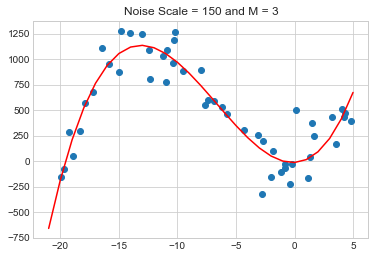

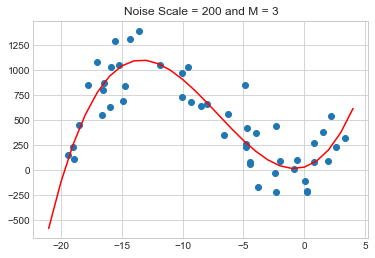

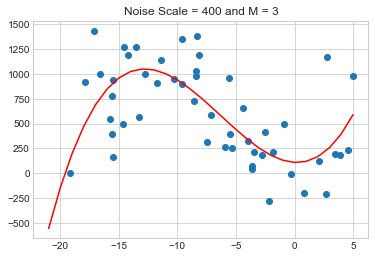

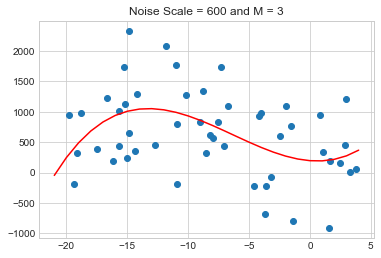

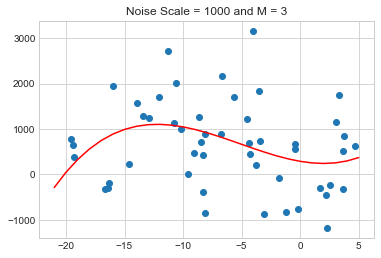

In [13]:
noise = [150, 200, 400, 600, 1000]

for n in noise:
  x = 25 * (np.random.rand(number_of_samples, 1) - 0.8)
  y = 5 * x + 20 * x**2 + 1 * x**3 + n * np.random.randn(number_of_samples, 1) 
  x = np.squeeze(x)
  y = np.squeeze(y)
  poly = np.poly1d(np.polyfit(x, y, 3))
  xfit = []
  yfit = []
  for i in range(math.floor(min(x))-1, math.ceil(max(x))+1):
    xfit.append(i)
    yfit.append(poly(i))

  plt.title(('Noise Scale = ' + str(n) + ' and M = 3'))
  plt.plot(xfit, yfit, 'r')
  plt.scatter(x, y)
  plt.show()

**Part 4**

Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot
the polynomials with the m found in 2). Discuss the impact of the number of samples to the accuracy of the returned parameters. [You need to plot a figure like in 1) for each choice of number_of_samples.]

In this problem, the number of samples was linearly scaled from 40 to 10. The original noisy data can be seen below (Blue) overlayed by the fitted polynomial (Red). As the number of samples decreased, the polyfit() function had an easier time minimizing the distance of the fitted curve to each of the sample points. In the first graph (sample: 40), the data points are very spread out, and the fitted resultant polynomial left large gaps between some of the data points. In the last graph (sample: 10), the fitted curve passes through almost every data point. **Ultimately, as the sample size decreases, the accuracy of the fitted curve increases.** 

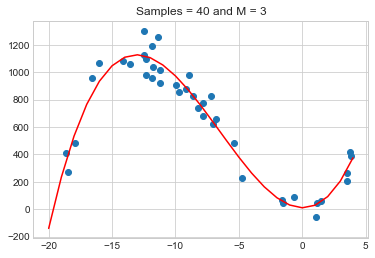

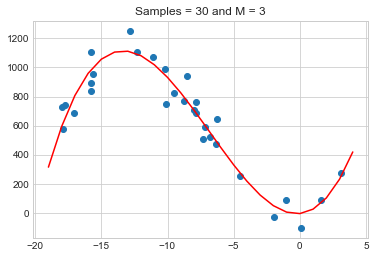

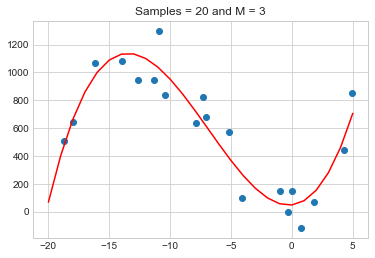

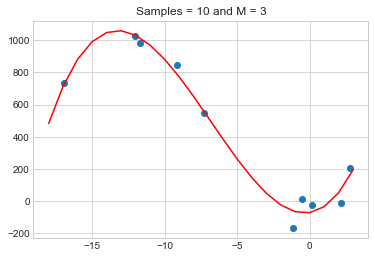

In [14]:
samples = [40, 30, 20, 10]

for n in samples:
  x = 25 * (np.random.rand(n, 1) - 0.8)
  y = 5 * x + 20 * x**2 + 1 * x**3 + 100 * np.random.randn(n, 1) 
  x = np.squeeze(x)
  y = np.squeeze(y)
  poly = np.poly1d(np.polyfit(x, y, 3))
  xfit = []
  yfit = []
  for i in range(math.floor(min(x))-1, math.ceil(max(x))+1):
    xfit.append(i)
    yfit.append(poly(i))

  plt.title(('Samples = ' + str(n) + ' and M = 3'))
  plt.plot(xfit, yfit, 'r')
  plt.scatter(x, y)
  plt.show()